In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [103]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

In [104]:
X = np.arange(-45, 60)

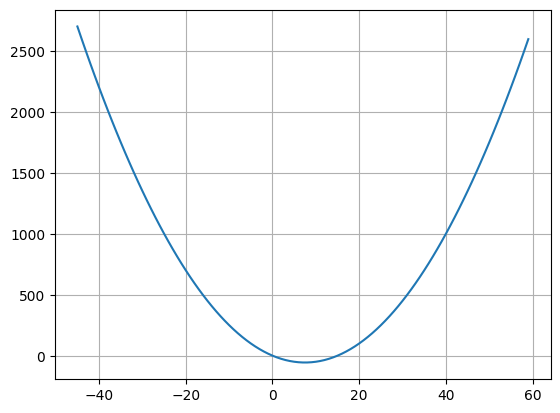

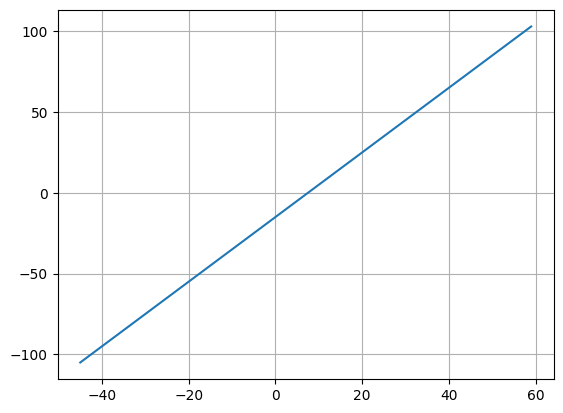

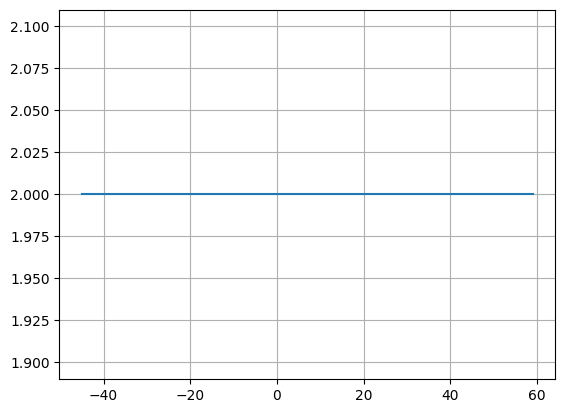

In [105]:
# Plot the Data
plt.grid()
plt.plot(X, f(X))
plt.show()

# Plot the first derivative
plt.grid()
plt.plot(X, Df(X))
plt.show()

# Plot the second derivative
plt.grid()
plt.plot(X, [DDf(X)]*X.size)
plt.show()

In [ ]:
def gradient_descent(first_der, x0: float, alpha: float, epsilon: float, max_iterations: int) -> tuple:
    '''
    A Function to apply gradient descent on a function to find the minimum.

    Args:
        first_der (function): Function to get first derivative at a point.
        x0 (float): The starting value.
        alpha (float): Learning rate.
        epsilon (float): Small Value to stop iterations if gradient fell below it.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        x_t, x_t_gradient (tuple): Final values of minimum value and gradient at that point.
    '''

    # Check the input parameters
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    # Initialize x_t
    x_t = x0

    # Training Loop
    for iteration in range(max_iterations):

        # Get the gradient 
        x_t_gradient = first_der(x_t)

        # Get the updated value
        x_t -= (alpha * x_t_gradient)

        # If the gradient gets too small, then exit the training
        if x_t_gradient < epsilon:
            break


    print(f'GD Results with x0 = {x0}, lr={alpha}, epsilon={epsilon}')
    print(f'Found solution after {iteration+1} iterations.')
    print('x_min =', x_t)
    print('Gradient =', x_t_gradient)

    return x_t, x_t_gradient

In [ ]:
def newtons_method(first_der, second_der, x0: float, alpha: float, epsilon: float, max_iterations: int) -> tuple:
    '''
    A Function to Apply Newton's Method to find the minimum of a function.

    Args:
        first_der (function): Function to get first derivative at a point.
        second_der (function): Function to get second derivative at a point.
        x0 (float): The starting value.
        alpha (float): Learning rate.
        epsilon (float): Small Value to stop iterations if gradient fell below it.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        x_t, x_t_gradient (tuple): Final values of minimum value and gradient at that point.
    '''

    # Check the input parameters
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    # Initialize x_t
    x_t = x0

    # Training Loop
    for iteration in range(max_iterations):

        # Get the step
        x_t_first_der = first_der(x_t)
        x_t_second_der = second_der(x_t)
        x_step = x_t_first_der / x_t_second_der

        # Get the updated value
        x_t -= (alpha * x_step)

        # If the gradient gets too small, then exit the training
        if x_t_first_der < epsilon:
            break


    print(f'Newton\'s Method Results with x0 = {x0}, lr={alpha}, epsilon={epsilon}')
    print(f'Found solution after {iteration+1} iterations.')
    print('x_min =', x_t)
    print('Gradient =', x_t_first_der)

    return x_t, x_t_first_der

In [108]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1
x_t, x_t_gradient = gradient_descent(first_der=Df, x0=40, alpha=0.01, epsilon=0.1, max_iterations=350)

GD Results with x0 = 40, lr=0.01, epsilon=0.1
Found solution after 322 iterations.
x_min = 7.548604864188269
Gradient = 0.09919360038422198


In [109]:
# Newton's method without learning rate, x0=40, epsilon = 0.1
x_t, x_t_gradient = newtons_method(first_der=Df, second_der=DDf, x0=40, alpha=1, epsilon=0.1, max_iterations=20)

Newton's Method Results with x0 = 40, lr=1, epsilon=0.1
Found solution after 2 iterations.
x_min = 7.5
Gradient = 0.0


In [110]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1
x_t, x_t_gradient = newtons_method(first_der=Df, second_der=DDf, x0=40, alpha=0.8, epsilon=0.1, max_iterations=20)

Newton's Method Results with x0 = 40, lr=0.8, epsilon=0.1
Found solution after 6 iterations.
x_min = 7.50208
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

In [111]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

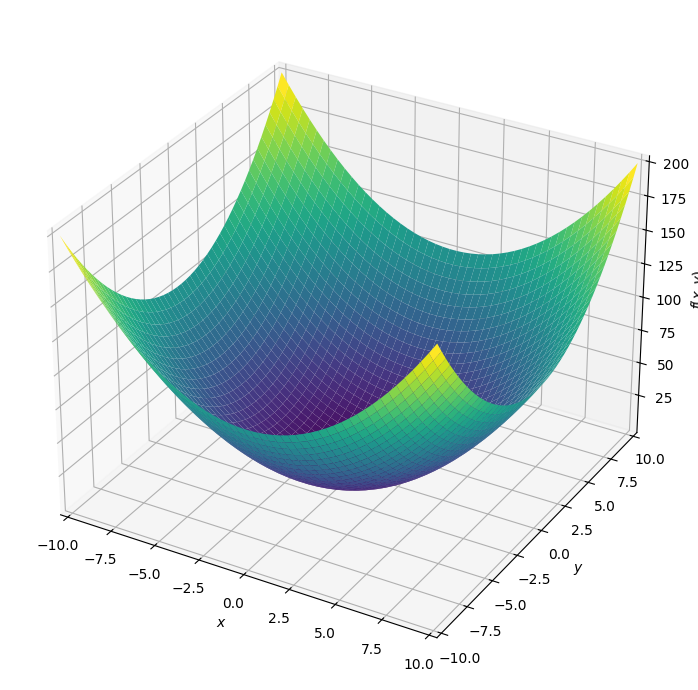

In [112]:
x, y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

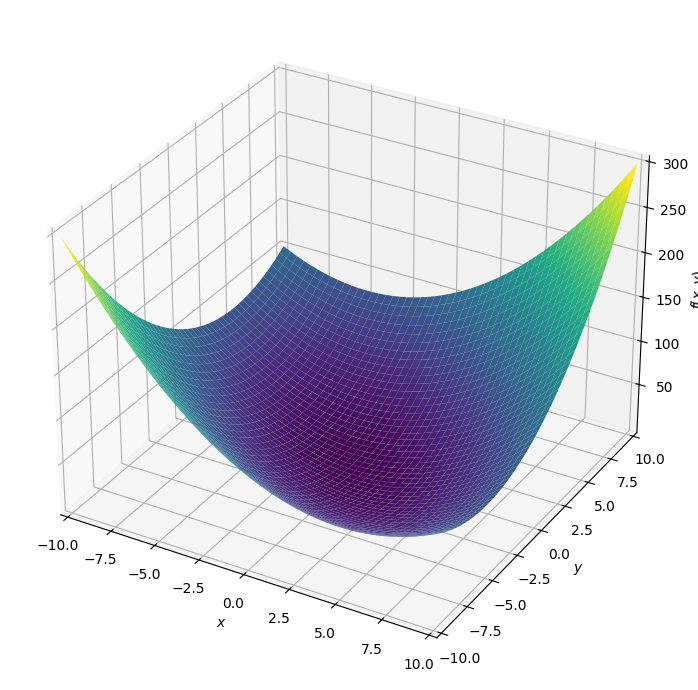

In [113]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

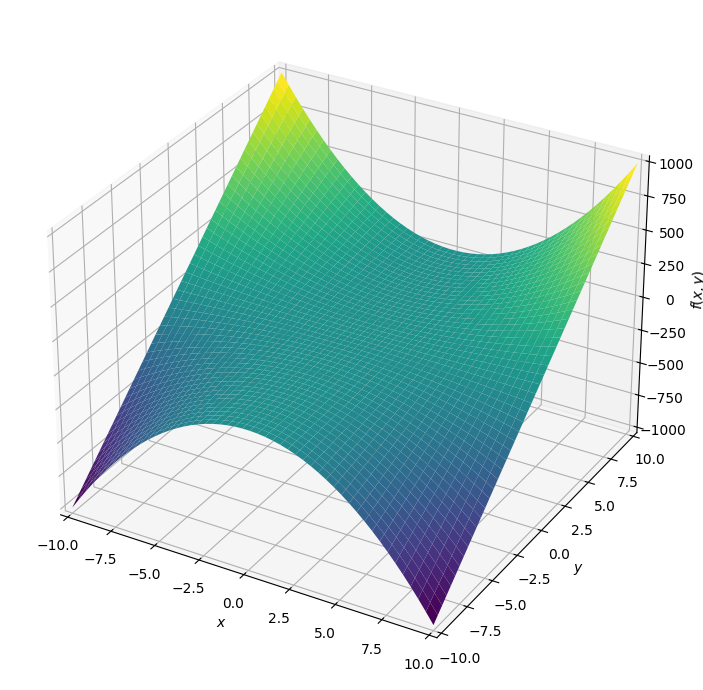

In [114]:
x, y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [ ]:
def gradient_descent(first_der, x0: float, alpha: float, epsilon: float, max_iterations: int) -> tuple:
    '''
    Function to get minimum point for a multivariable function using gradient descent.

    Args:
        first_der (function): Function to get first derivative at a point.
        x0 (float): The starting value.
        alpha (float): Learning rate.
        epsilon (float): Small Value to stop iterations if gradient fell below it.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        x_t, x_t_gradient (tuple): Final values of minimum value and gradient at that point.
    '''

    # Check the input parameters
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    # Initialize x_t
    x_t = x0.copy()

    # Training Loop
    for iteration in range(max_iterations):

        # Get the gradient 
        x_t_gradient = first_der(x_t)
        #print('g:', x_t_gradient)

        # Get the updated value
        x_t -= (alpha * x_t_gradient)
        #print('x_m:',x_t)

        # If the gradient gets too small, then exit the training
        if np.linalg.norm(x_t_gradient) < epsilon:
            break
        

    print(f'GD Results with x0 = {x0}, lr={alpha}, epsilon={epsilon}')
    print(f'Found solution after {iteration+1} iterations.')
    print('xy_min =', x_t)
    print('Gradient =', x_t_gradient)

    return x_t, x_t_gradient

In [ ]:
def newtons_method(first_der, second_der, x0: float, alpha: float, epsilon: float, max_iterations: int) -> tuple:
    '''
    A Function to get the minimum point for a multivariable function using Newton's Method.

    Args:
        first_der (function): Function to get first derivative at a point.
        second_der (function): Function to get second derivative at a point.
        x0 (float): The starting value.
        alpha (float): Learning rate.
        epsilon (float): Small Value to stop iterations if gradient fell below it.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        x_t, x_t_gradient (tuple): Final values of minimum value and gradient at that point.
    '''

    # Check the input parameters
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    # Initialize x_t
    x_t = x0.copy()

    # Training Loop
    for iteration in range(max_iterations):

        # Get the step
        x_t_first_der = first_der(x_t)
        hessian_mat = second_der(x_t)
        x_step = np.linalg.inv(hessian_mat) @ x_t_first_der

        # Get the updated value
        x_t -= (alpha * x_step)

        # If the gradient gets too small, then exit the training
        if np.linalg.norm(x_t_first_der) < epsilon:
            break


    print(f'Newton\'s Method Results with x0 = {x0}, lr={alpha}, epsilon={epsilon}')
    print(f'Found solution after {iteration+1} iterations.')
    print('xy_min =', x_t)
    print('Gradient =', x_t_first_der)

    return x_t, x_t_first_der

In [129]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                            [0,2]])

In [118]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001
x_t, x_t_gradient = gradient_descent(first_der=Df_1, x0=np.array([10.0,10.0]), alpha=0.1, epsilon=0.001, max_iterations=50)

GD Results with x0 = [10. 10.], lr=0.1, epsilon=0.001
Found solution after 47 iterations.
xy_min = [0.00027876 0.00027876]
Gradient = [0.0006969 0.0006969]


In [119]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
x_t, x_t_gradient = gradient_descent(first_der=Df_1, x0=np.array([10.0,10.0]), alpha=0.5, epsilon=0.001, max_iterations=50)


GD Results with x0 = [10. 10.], lr=0.5, epsilon=0.001
Found solution after 2 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [130]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x_t, x_t_gradient = newtons_method(first_der=Df_1, second_der=DDf_1, x0=np.array([10.0,10.0]), alpha=1, epsilon=0.001, max_iterations=50)

Newton's Method Results with x0 = [10. 10.], lr=1, epsilon=0.001
Found solution after 2 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [132]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001
x_t, x_t_gradient = newtons_method(first_der=Df_1, second_der=DDf_1, x0=np.array([10.0,10.0]), alpha=0.5, epsilon=0.001, max_iterations=50)

Newton's Method Results with x0 = [10. 10.], lr=0.5, epsilon=0.001
Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient = [0.00061035 0.00061035]


In [133]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                            [1,2]])

In [134]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
x_t, x_t_gradient = gradient_descent(first_der=Df_2, x0=np.array([10.0,10.0]), alpha=0.5, epsilon=0.001, max_iterations=50)

GD Results with x0 = [10. 10.], lr=0.5, epsilon=0.001
Found solution after 17 iterations.
xy_min = [-7.62939453e-05 -7.62939453e-05]
Gradient = [0.00045776 0.00045776]


In [135]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x_t, x_t_gradient = newtons_method(first_der=Df_2, second_der=DDf_2, x0=np.array([10.0,10.0]), alpha=1, epsilon=0.001, max_iterations=50)

Newton's Method Results with x0 = [10. 10.], lr=1, epsilon=0.001
Found solution after 2 iterations.
xy_min = [0. 0.]
Gradient = [3.55271368e-15 1.77635684e-15]


In [136]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001
x_t, x_t_gradient = newtons_method(first_der=Df_2, second_der=DDf_2, x0=np.array([10.0,10.0]), alpha=0.9, epsilon=0.001, max_iterations=50)

Newton's Method Results with x0 = [10. 10.], lr=0.9, epsilon=0.001
Found solution after 6 iterations.
xy_min = [1.e-05 1.e-05]
Gradient = [0.0003 0.0003]


In [147]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                            [2*X[0],0]])

In [149]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001
x_t, x_t_gradient = gradient_descent(first_der=Df_5, x0=np.array([10.0,10.0]), alpha=0.01, epsilon=0.001, max_iterations=90)

GD Results with x0 = [10. 10.], lr=0.01, epsilon=0.001
Found solution after 80 iterations.
xy_min = [5.87348108e-05 6.85061189e+00]
Gradient = [9.32503127e-04 4.63214210e-09]


In [146]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x_t, x_t_gradient = newtons_method(first_der=Df_5, second_der=DDf_5, x0=np.array([10.0,10.0]), alpha=1, epsilon=0.001, max_iterations=50)

Newton's Method Results with x0 = [10. 10.], lr=1, epsilon=0.001
Found solution after 10 iterations.
xy_min = [0.00976562 0.00976562]
Gradient = [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [ ]:
def bfgs(first_der, second_der, xk_1: float, x0: float, alpha: float, epsilon: float, max_iterations: int) -> tuple:
    '''
    A Function to get the minimum at a point using BFGS.

    Args:
        first_der (function): Function to get first derivative at a point.
        second_der (function): Function to get second derivative at a point.
        x0 (float): The starting value.
        xk_1 (float): The starting value.
        alpha (float): Learning rate.
        epsilon (float): Small Value to stop iterations if gradient fell below it.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        x_t, x_t_gradient (tuple): Final values of minimum value and gradient at that point.
    '''

    # Check the input parameters
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    # Initialize x_t
    x_t = x0.copy()
    b_inverse = np.eye(x0.size)

    # Training Loop
    for iteration in range(max_iterations):

        # Get the gradients
        x_t_grad = first_der(x_t)
        x_k_1_grad = first_der(xk_1)

        print('xn_1:\n', xk_1)
        print('xn:\n', x_t)

        print('Dfxn_1:\n', x_k_1_grad)
        print('Dfxn:\n', x_t_grad)

        
        print('Grad_Norm:\n', np.linalg.norm(x_t_grad))
        print('************')
        

        # If the gradient gets too small, then exit the training
        if np.linalg.norm(x_t_grad) < epsilon:
            break

        
        # Get B inverse
        identity_mat = np.eye(x0.size)
        delta_x = x_t - xk_1
        delta_gradient = x_t_grad - x_k_1_grad

        exp_1 = (delta_x @ delta_gradient.T) / (delta_gradient.T @ delta_x)
        exp_2 = (delta_gradient @ delta_x.T) / (delta_gradient.T @ delta_x)
        exp_3 = (delta_x @ delta_x.T) / (delta_gradient.T @ delta_x)

        b_inverse = (identity_mat - exp_1) @ b_inverse @ (identity_mat - exp_2) + exp_3
        print('B_inv:\n', b_inverse)

        # Swap 
        xk_1 = x_t.copy()

        # Get the new x
        x_step = b_inverse @ x_t_grad

        # Get the updated value
        x_t -= (alpha * x_step)


    print(f'\n\nFound solution after {iteration+1} iterations.')
    print('xy_min =', x_t)
    print('Gradient =', x_t_grad)

    return x_t, x_t_grad

In [170]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
x_t, x_t_grad = bfgs(first_der=Df_1, second_der=DDf_1, xk_1=np.array([10.0,10.0]).reshape(2, 1), x0=np.array([9.0,9.0]).reshape(2, 1), alpha=1, epsilon=0.001, max_iterations=300)

xn_1:
 [[10.]
 [10.]]
xn:
 [[9.]
 [9.]]
Dfxn_1:
 [[20.]
 [20.]]
Dfxn:
 [[18.]
 [18.]]
Grad_Norm:
 25.45584412271571
************
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
 [[9.]
 [9.]]
xn:
 [[0.]
 [0.]]
Dfxn_1:
 [[18.]
 [18.]]
Dfxn:
 [[0.]
 [0.]]
Grad_Norm:
 0.0
************


Found solution after 2 iterations.
xy_min = [[0.]
 [0.]]
Gradient = [[0.]
 [0.]]


In [171]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9
x_t, x_t_grad = bfgs(first_der=Df_1, second_der=DDf_1, xk_1=np.array([10.0,10.0]).reshape(2, 1), x0=np.array([9.0,9.0]).reshape(2, 1), alpha=0.9, epsilon=0.001, max_iterations=300)

xn_1:
 [[10.]
 [10.]]
xn:
 [[9.]
 [9.]]
Dfxn_1:
 [[20.]
 [20.]]
Dfxn:
 [[18.]
 [18.]]
Grad_Norm:
 25.45584412271571
************
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
 [[9.]
 [9.]]
xn:
 [[0.9]
 [0.9]]
Dfxn_1:
 [[18.]
 [18.]]
Dfxn:
 [[1.8]
 [1.8]]
Grad_Norm:
 2.545584412271572
************
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
 [[0.9]
 [0.9]]
xn:
 [[0.09]
 [0.09]]
Dfxn_1:
 [[1.8]
 [1.8]]
Dfxn:
 [[0.18]
 [0.18]]
Grad_Norm:
 0.25455844122715704
************
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
 [[0.09]
 [0.09]]
xn:
 [[0.009]
 [0.009]]
Dfxn_1:
 [[0.18]
 [0.18]]
Dfxn:
 [[0.018]
 [0.018]]
Grad_Norm:
 0.025455844122715694
************
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
 [[0.009]
 [0.009]]
xn:
 [[0.0009]
 [0.0009]]
Dfxn_1:
 [[0.018]
 [0.018]]
Dfxn:
 [[0.0018]
 [0.0018]]
Grad_Norm:
 0.0025455844122715702
************
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
xn_1:
 [[0.0009]
 [0.0009]]
xn:
 [[9.e-05]
 [9.e-05]]
Dfxn_1:
 [[0.0018]
 [0.0018]]
Dfxn:
 [[0.00018]
 [0.000

In [178]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
x_t, x_t_grad = bfgs(first_der=Df_2, second_der=DDf_2, xk_1=np.array([10.0,10.0]).reshape(2, 1), x0=np.array([9.0,9.0]).reshape(2, 1), alpha=1, epsilon=0.001, max_iterations=300)

xn_1:
 [[10.]
 [10.]]
xn:
 [[9.]
 [9.]]
Dfxn_1:
 [[30.]
 [30.]]
Dfxn:
 [[27.]
 [27.]]
Grad_Norm:
 38.18376618407357
************
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
 [[9.]
 [9.]]
xn:
 [[3.55271368e-15]
 [1.77635684e-15]]
Dfxn_1:
 [[27.]
 [27.]]
Dfxn:
 [[8.88178420e-15]
 [7.10542736e-15]]
Grad_Norm:
 1.1374233532693354e-14
************


Found solution after 2 iterations.
xy_min = [[3.55271368e-15]
 [1.77635684e-15]]
Gradient = [[8.88178420e-15]
 [7.10542736e-15]]


In [ ]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9
x_t, x_t_grad = bfgs(first_der=Df_2, second_der=DDf_2, xk_1=np.array([10.0,10.0]).reshape(2, 1), x0=np.array([9.0,9.0]).reshape(2, 1), alpha=0.9, epsilon=0.001, max_iterations=300)

xn_1:
 [[10.]
 [10.]]
xn:
 [[9.]
 [9.]]
Dfxn_1:
 [[30.]
 [30.]]
Dfxn:
 [[27.]
 [27.]]
************
Grad_Norm:
 38.18376618407357
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
 [[9.]
 [9.]]
xn:
 [[0.9]
 [0.9]]
Dfxn_1:
 [[27.]
 [27.]]
Dfxn:
 [[2.7]
 [2.7]]
************
Grad_Norm:
 3.8183766184073655
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
 [[0.9]
 [0.9]]
xn:
 [[0.09]
 [0.09]]
Dfxn_1:
 [[2.7]
 [2.7]]
Dfxn:
 [[0.27]
 [0.27]]
************
Grad_Norm:
 0.38183766184073553
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
 [[0.09]
 [0.09]]
xn:
 [[0.009]
 [0.009]]
Dfxn_1:
 [[0.27]
 [0.27]]
Dfxn:
 [[0.027]
 [0.027]]
************
Grad_Norm:
 0.03818376618407363
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
xn_1:
 [[0.009]
 [0.009]]
xn:
 [[0.0009]
 [0.0009]]
Dfxn_1:
 [[0.027]
 [0.027]]
Dfxn:
 [[0.0027]
 [0.0027]]
************
Grad_Norm:
 0.0038183766184073666
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.

In [ ]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
x_t, x_t_grad = bfgs(first_der=Df_5, second_der=DDf_5, xk_1=np.array([10.0,10.0]).reshape(2, 1), x0=np.array([9.0,9.0]).reshape(2, 1), alpha=1, epsilon=0.001, max_iterations=300)

xn_1:
 [[10.]
 [10.]]
xn:
 [[9.]
 [9.]]
Dfxn_1:
 [[200.]
 [100.]]
Dfxn:
 [[162.]
 [ 81.]]
Grad_Norm:
 181.12150617748296
************
B_inv:
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
xn_1:
 [[9.]
 [9.]]
xn:
 [[4.73684211]
 [4.73684211]]
Dfxn_1:
 [[162.]
 [ 81.]]
Dfxn:
 [[44.87534626]
 [22.43767313]]
Grad_Norm:
 50.17216237603412
************
B_inv:
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
xn_1:
 [[4.73684211]
 [4.73684211]]
xn:
 [[3.10344828]
 [3.10344828]]
Dfxn_1:
 [[44.87534626]
 [22.43767313]]
Dfxn:
 [[19.2627824]
 [ 9.6313912]]
Grad_Norm:
 21.536445443220423
************
B_inv:
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
xn_1:
 [[3.10344828]
 [3.10344828]]
xn:
 [[1.875]
 [1.875]]
Dfxn_1:
 [[19.2627824]
 [ 9.6313912]]
Dfxn:
 [[7.03125 ]
 [3.515625]]
Grad_Norm:
 7.861176483398089
************
B_inv:
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
xn_1:
 [[1.875]
 [1.875]]
xn:
 [[1.16883117]
 [1.16883117]]
Dfxn_1:
 [[7.03125 ]
 [3.51562